<a href="https://colab.research.google.com/github/arunmadapathi-1609/Heart_Disease_Prediction_using_p-ython_.ipynb/blob/main/Rainfall%20prediction%20using%20Machine%20Learning%20with%20python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

In [109]:
 rainfall_data =pd.read_csv('/content/Rainfall.csv')

In [110]:
rainfall_data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [111]:
rainfall_data.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [112]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [113]:

rainfall_data.shape

(366, 12)

In [114]:
rainfall_data.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [115]:
#foe removing the extra spaces in thr columns
rainfall_data.columns=rainfall_data.columns.str.strip()

In [116]:
rainfall_data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [117]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [118]:
rainfall_data.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


In [119]:
rainfall_data["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [120]:
# handle missing values
rainfall_data["winddirection"] = rainfall_data["winddirection"].fillna(rainfall_data["winddirection"].mode()[0])
rainfall_data["windspeed"] = rainfall_data["windspeed"].fillna(rainfall_data["windspeed"].median())

In [121]:
rainfall_data.isnull().sum()

,0
day,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0


In [122]:
rainfall_data.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,4.419399,101.284153,21.534153
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,3.934398,81.722827,10.056054
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.500000,40.000000,13.725000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,8.200000,190.000000,27.825000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,12.100000,350.000000,59.500000


In [123]:
rainfall_data['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [124]:
rainfall_data['rainfall'].unique()

array(['yes', 'no'], dtype=object)

In [125]:
# converting the yes & no to 1 and 0
rainfall_data["rainfall"] = rainfall_data["rainfall"].map({"yes": 1, "no": 0})

In [126]:
rainfall_data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


In [127]:
rainfall_data.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,1,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,1,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,1,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,1,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,0,5.7,20.0,23.3


In [128]:
# data analysis
rainfall_data.shape

(366, 12)

In [129]:
sns.set(style ="whitegrid")

In [130]:
rainfall_data.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


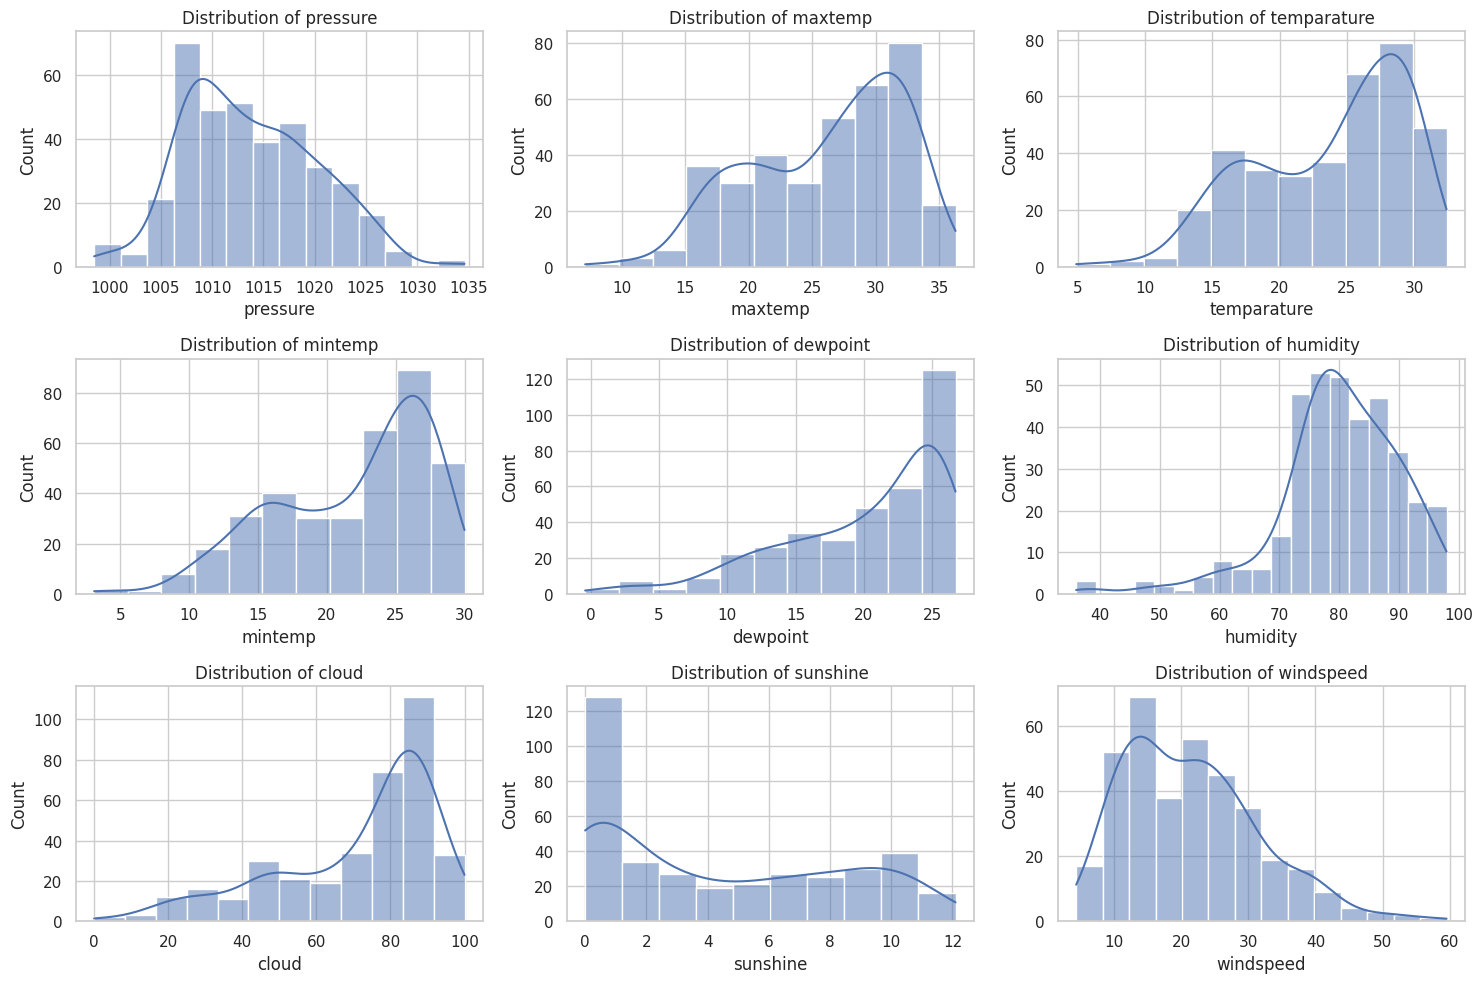

In [131]:

plt.figure(figsize=(15, 10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'], 1):
  plt.subplot(3, 3, i)
  sns.histplot(rainfall_data[column], kde=True)
  plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

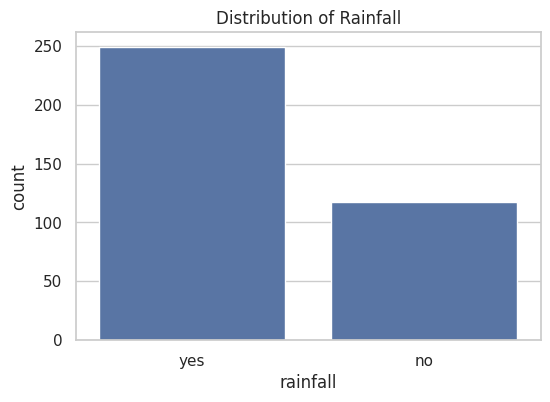

In [132]:
plt.figure(figsize=(6,4))
sns.countplot(x="rainfall" , data=data)
plt.title("Distribution of Rainfall")
plt.show()

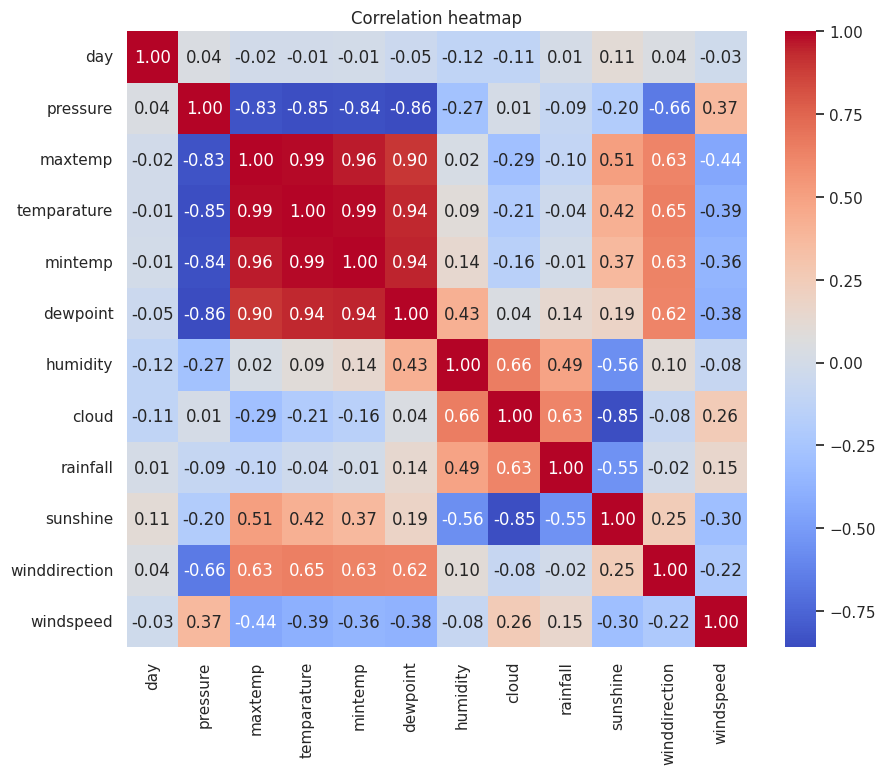

In [133]:
# correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(rainfall_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

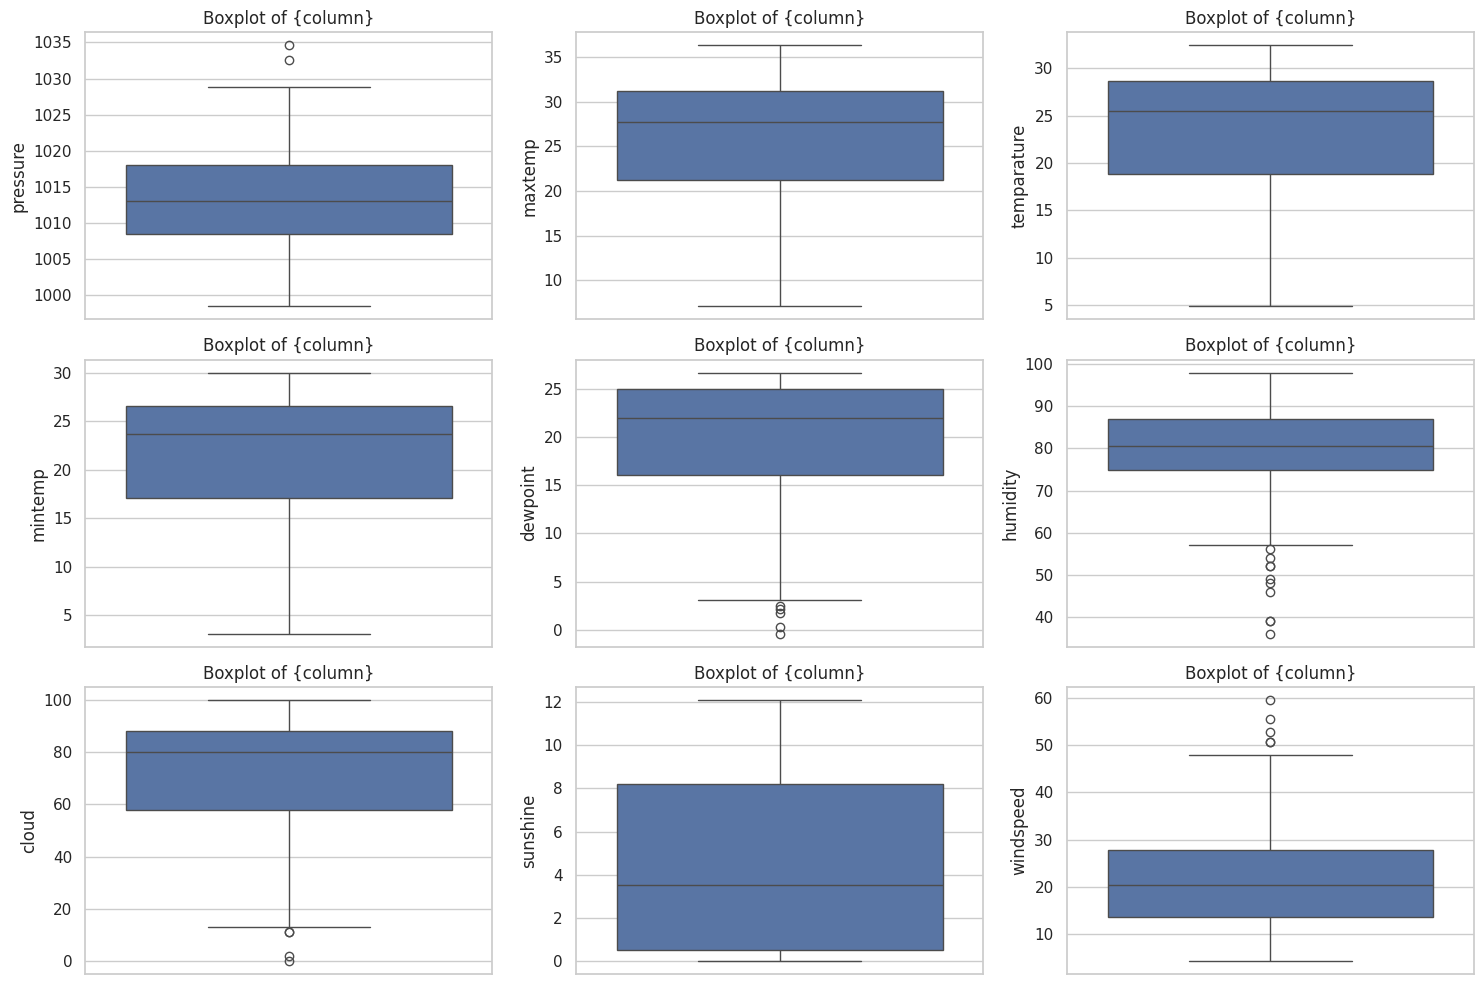

In [134]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'], 1):
  plt.subplot(3, 3, i)
  sns.boxplot(rainfall_data[column])
  plt.title("Boxplot of {column}")

plt.tight_layout()
plt.show()

In [135]:
# data preprocessing
# dropping the highly corelatted columns
rainfall_data =rainfall_data.drop(columns=['maxtemp', 'temparature', 'mintemp',])

In [136]:
rainfall_data.head()

,day,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [137]:
rainfall_data.tail()

,day,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,15.0,84,90,1,0.0,30.0,18.4
362,28,1026.6,12.8,75,85,1,1.0,20.0,25.9
363,29,1025.9,13.3,75,78,1,4.6,70.0,33.4
364,30,1025.3,13.3,78,86,1,1.2,20.0,20.9
365,31,1026.4,13.0,74,66,0,5.7,20.0,23.3


In [138]:
rainfall_data.shape

(366, 9)

In [139]:
rainfall_data['rainfall'].value_counts()

,count
rainfall,
1,249
0,117


In [140]:

#separating as the majority and the minority classes
df_majority =rainfall_data[rainfall_data['rainfall'] ==1]
df_minority =rainfall_data[rainfall_data['rainfall'] ==0]

In [141]:
print(df_majority.shape)

(249, 9)


In [142]:
print(df_minority.shape)

(117, 9)


In [143]:
# downsample majority class to the minority class
df_majority_downsampled = resample(df_majority,replace=False , n_samples=len(df_minority), random_state=42)

In [144]:

df_majority_downsampled.shape

(117, 9)

In [145]:
df_downsampled = pd.concat([df_majority_downsampled,df_minority])

In [146]:

df_downsampled.shape

(234, 9)

In [147]:
df_downsampled.head()

,day,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,7,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,10,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,17,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,30,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,6,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [148]:
#shuffling the final dataform
df_downsampled=df_downsampled.sample(frac=1).reset_index(drop=True)

In [149]:
df_downsampled.head()

,day,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,19,1010.3,26.1,80,41,0,12.0,130.0,12.4
1,5,1015.2,25.4,93,88,1,0.9,100.0,37.0
2,13,1016.4,17.8,85,83,1,0.0,70.0,30.3
3,19,1007.7,25.7,77,59,0,10.4,230.0,16.6
4,2,1010.9,24.8,94,88,1,0.0,110.0,16.5


In [150]:
df_downsampled['rainfall'].value_counts()

,count
rainfall,
0,117
1,117


In [151]:
# spliiting features and targets as x and y
x=rainfall_data.drop(columns='rainfall' , axis =1,)
y=rainfall_data['rainfall']


In [152]:
print(x)

     day  pressure  dewpoint  humidity  cloud  sunshine  winddirection  \
0      1    1025.9      13.1        72     49       9.3           80.0   
1      2    1022.0      15.6        81     83       0.6           50.0   
2      3    1019.7      18.4        95     91       0.0           40.0   
3      4    1018.9      18.8        90     88       1.0           50.0   
4      5    1015.9      19.9        95     81       0.0           40.0   
..   ...       ...       ...       ...    ...       ...            ...   
361   27    1022.7      15.0        84     90       0.0           30.0   
362   28    1026.6      12.8        75     85       1.0           20.0   
363   29    1025.9      13.3        75     78       4.6           70.0   
364   30    1025.3      13.3        78     86       1.2           20.0   
365   31    1026.4      13.0        74     66       5.7           20.0   

     windspeed  
0         26.3  
1         15.3  
2         14.2  
3         16.9  
4         13.7  
..       

In [153]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
361    1
362    1
363    1
364    1
365    0
Name: rainfall, Length: 366, dtype: int64


In [154]:
# spliiting the training and tetsing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, stratify=y , random_state=42)

In [155]:
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
     "n_estimators": [50, 100, 200],
    "max_features": ["sqrt", "log2"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [156]:
#hyper turning using the girdsearchcv
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

grid_search_rf.fit(x_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [157]:
best_rf_model =grid_search_rf.best_estimator_
print ("the best parameters for Random Forest :",grid_search_rf.best_params_)

the best parameters for Random Forest : {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [158]:
# model evaluation
cv_scores = cross_val_score(best_rf_model, x_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.86440678 0.79661017 0.82758621 0.82758621 0.79310345]
Mean cross-validation score: 0.8218585622443015


In [159]:
# test set perfromance and accuracy
y_pred = best_rf_model.predict(x_test)

print("Test set Accuracy:", accuracy_score(y_test, y_pred))
print("Test set Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test set Accuracy: 0.8378378378378378
Test set Confusion Matrix:
 [[15  9]
 [ 3 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.62      0.71        24
           1       0.84      0.94      0.89        50

    accuracy                           0.84        74
   macro avg       0.84      0.78      0.80        74
weighted avg       0.84      0.84      0.83        74



In [160]:
input_data = (5, 1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)

input_df = pd.DataFrame([input_data], columns=['day', 'pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine','winddirection', 'windspeed'])

In [161]:
input_df

,day,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,5,1015.9,19.9,95,81,0.0,40.0,13.7


In [162]:
prediction = best_rf_model.predict(input_df)

In [163]:
print(prediction)

[1]


In [164]:

prediction[0]

np.int64(1)

In [165]:
prediction = best_rf_model.predict(input_df)
print("Prediction result:", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction result: Rainfall


In [166]:
# save model and features names to a pickle
model_data = {"model": best_rf_model,"feature_names":x.columns.tolist()}

with open ("model.pkl" , "wb") as file:
  pickle.dump(model_data,file)

In [167]:
# load the save file and use it for the prediction

import pickle
import pandas as pd


In [168]:
# load the trained model and feature names from the pickle file
with open("model.pkl", "rb") as file:
  model_data = pickle.load(file)

In [169]:

model = model_data["model"]
feature_names = model_data["feature_names"]

In [170]:
input_data = ( 0 ,1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)

input_df = pd.DataFrame([input_data], columns=feature_names)

In [171]:
prediction = best_rf_model.predict(input_df)
print("Prediction result:", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction result: Rainfall
